# Doing a Laplace inverse transform
## It's not working use code 662 that you've downloaded

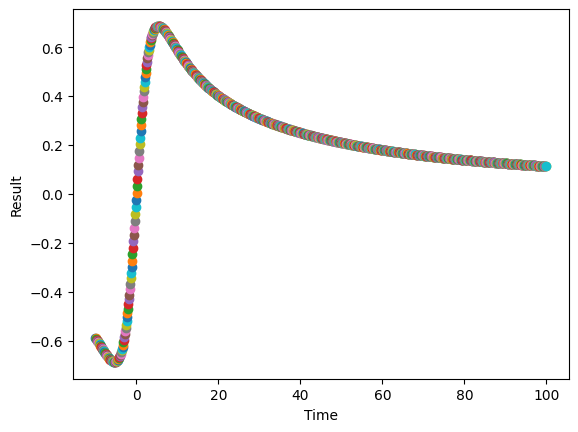

In [27]:
import math
import matplotlib.pyplot as plt
import numpy as np


def dqext(n, epstab, result, abserr, res3la, nres):
    delta1 = delta2 = delta3 = 0.0
    err1 = err2 = err3 = 0.0
    e0 = e1 = e2 = e3 = 0.0
    newelm = 0
    error = 0.0

    # First loop for new elements in the epsilon table
    for i in range(1, n + 1):
        k1 = 2 * i - 1
        k2 = 2 * i
        res = epstab[k1 + 1]
        e0 = epstab[k1 - 1]
        e1 = epstab[k1]
        e2 = res
        e1abs = abs(e1)
        delta2 = e2 - e1
        err2 = abs(delta2)
        tol2 = max(abs(e2), e1abs) * 2.220446049250313e-16
        delta3 = e1 - e0
        err3 = abs(delta3)
        tol3 = max(e1abs, abs(e0)) * 2.220446049250313e-16

        # Check convergence
        if err2 > tol2 or err3 > tol3:
            break

        # If E0, E1, and E2 are equal within machine accuracy, assume convergence
        result = e2
        abserr = err2 + err3

    else:
        # If the loop completes without a break, set the new element count
        newelm = (n - 1) // 2

        # Initialize error to a large value
        abserr = 1e38

        # Initialize result to the last element
        result = epstab[n]

        for i in range(1, newelm + 1):
            k1 = 2 * i - 1
            k2 = 2 * i
            res = epstab[k1 + 1]
            e0 = epstab[k1 - 1]
            e1 = epstab[k1]
            e2 = res
            e1abs = abs(e1)
            delta2 = e2 - e1
            err2 = abs(delta2)
            tol2 = max(abs(e2), e1abs) * 2.220446049250313e-16
            delta3 = e1 - e0
            err3 = abs(delta3)
            tol3 = max(e1abs, abs(e0)) * 2.220446049250313e-16

            if err2 > tol2 or err3 > tol3:
                break

            # If E0, E1, and E2 are equal within machine accuracy, assume convergence
            result = e2
            abserr = err2 + err3

    # Perform the necessary shifts in the epsilon table
    if n > 2:
        epstab[n + 2] = epstab[n]

        for i in range(newelm, 0, -1):
            k1 = 2 * i - 1
            k2 = 2 * i
            epstab[k1] = epstab[k1 - 2]
            epstab[k2] = epstab[k2 - 2]

        # Set the new element count
        n = 2 * newelm - 1

    # If the new element count is less than the original count, adjust N
    if n < len(epstab):
        epstab[:n + 1] = epstab[:n + 1]

    # If NRES is greater than or equal to 4, set the result to the last computed value
    if nres >= 4:
        res3la[0] = res3la[1]
        res3la[1] = res3la[2]
        res3la[2] = result
        abserr = 1e38

    return result, abserr

def d1mach(i):
    # Machine constants for the Python environment
    small = [2.220446049250313e-16, 0.0]
    large = [1.7976931348623157e+308, 0.0]
    right = [2.225073858507201e-308, 0.0]
    diver = [2.245953355600815e-308, 0.0]
    log10 = [0.3010299956639812, 0.0]

    if i == 1:
        return small[0]
    elif i == 2:
        return large[0]
    elif i == 3:
        return right[0]
    elif i == 4:
        return diver[0]
    elif i == 5:
        return log10[0]
    else:
        return 0.0

def fun(p):
    # Function to evaluate the Laplace transform of (1/(p^2 + 1))
    x = p[0]
    y = p[1]
    denom = x**2 + y**2 + 1
    result = [x / denom, -y / denom]
    return result

def dlainv(fun, t, c, epsre, epsab):
    # Inversion of Laplace transform using Durbin formula and epsilon algorithm

    # Initialize variables
    c1 = 5.0
    c2 = 25.0
    f1 = f2 = 0.0
    n = 0
    mmax = 100
    epstab = [0.0] * 500

    # Define constants
    fpi6 = math.pi / 6.0
    twopi = 2.0 * math.pi

    # Compute the initial approximation to the integral
    f0 = fun([t, c])
    f1 = fun([t, c1])
    f2 = fun([t, c2])
    h = (c2 - c1) / 2.0

    # Durbin formula
    u0 = (4.0 * f2[0] - f1[0] - 3.0 * f0[0]) / twopi
    u1 = (f2[0] - f1[0]) / fpi6
    v1 = (f2[1] - f1[1]) / fpi6
    sig1 = h * (u1 + 0.5 * u0)
    sig2 = h * (v1 + 0.5 * u1)
    x = h / 6.0 * (4.0 * (f2[0] + f1[0]) - f0[0])
    y = h / 6.0 * (4.0 * (f2[1] + f1[1]) - f0[1])

    epstab[0] = x
    epstab[1] = y

    for n in range(1, mmax + 1):
        # Apply the epsilon algorithm
        result, abserr = dqext(n, epstab, x, y, [f0[0], f1[0], f2[0]], 3)

        if abserr < epsab or abserr < epsre * abs(result):
            return result, abserr

        f0 = fun([t, c - n * fpi6])
        f1 = fun([t, c1 - n * fpi6])
        f2 = fun([t, c2 - n * fpi6])

        # Durbin formula
        u0 = (4.0 * f2[0] - f1[0] - 3.0 * f0[0]) / twopi
        u1 = (f2[0] - f1[0]) / fpi6
        v1 = (f2[1] - f1[1]) / fpi6
        sig1 = h * (u1 + 0.5 * u0)
        sig2 = h * (v1 + 0.5 * u1)
        x += sig1
        y += sig2

        # Store the new element in the epsilon table
        epstab[2 * n] = x
        epstab[2 * n + 1] = y

    return result, abserr

# Driver program
def main():
    # Initialize arrays for tolerances and time values
    tval = np.linspace(-10,100,1000)
    #tval = [1.0, 2.0, 3.0,4.0,5.0,6.0,7.0,8.0]
    epsre = 1e-8
    epsab = 1e-8

    # Iterate through different tolerance levels and time values
    for t in tval:
        #print(f"\nResults for t = {t}")

        # Compute the inverse Laplace transform using DLAINV subroutine
        result, abserr = dlainv(fun, t, 20.0, epsre, epsab)

        # Display the results
        #print(f"Result: {result}")
        #print(f"Absolute Error: {abserr}")

        # Plot the results
        plt.plot(t, result, 'o')

    # Display the plot
    plt.xlabel('Time')
    plt.ylabel('Result')

    plt.show()     
        

if __name__ == "__main__":
    main()

## Code 662

## Annex

## Test for numerical Laplace Transform

In [ ]:
import mpmath
import numpy as np
import matplotlib.pyplot as plt

# Setting variables
uo = -1e-4
ao = 0.01
g = 1
lambdaa = 1
pu = 1
pl = 1
mu = 0.03162277660168
ml = 0.03162277660168

# Define Capital Lambda s
def hat(s):
    k = (2 * np.pi) / lambdaa
    L_l = (k * k + s / (ml / pl))**(1/2)
    L_u = (k * k + s / (mu / pu))**(1/2)
    p1 = -pl * pu * s + k * (mu - ml) * (pu * (k-L_l) - pl * (k-L_u))
    p2 = (k ** 2) * ((ml - mu) ** 2) * (k - L_l) * (k - L_u) * (1/s)
    p3 = (pl + pu) * (pl * (k - L_u) + pu * (k - L_l))
    return 4 * k * ((p1 + p2) / p3)

# Define the Laplace-transformed Amplitude
def Amp_s(s):
    omega_o_2 = (2 * np.pi * g) / lambdaa
    fract = (s * uo - omega_o_2 * ao) / (s * s + hat(s) * s + omega_o_2)
    return (1 / s) * (ao + fract)

# Specify the time values
t3 = np.linspace(0.1, 10, 100)

# Compute the inverse Laplace transform for each time value
A3 = np.array([mpmath.invertlaplace(Amp_s, t_val) for t_val in t3])


# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(t3, abs(A3), 'k-', lw=2, label='aProsperetti_22AF_1981')
ax.plot(t2, abs(A2), 'r-', lw=2, label='Prosperetti_20_1981')
ax.set_xlabel(r'$\sqrt{gt^2/\lambda_w}$', fontsize=15)
ax.set_ylabel(r'$\zeta/\lambda_w$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend()
plt.show()

# Define the Laplace-transformed Amplitude
def Amp_s(s):
    return 1 / (1 + s**2)

# Specify the time values
t_t = np.linspace(0, 10, 100)
A_t = np.zeros_like(t_t, dtype=complex)

# Perform the inversion with contour integration (method='dehoog')
for i, t in enumerate(t_t):
    A_t[i] = mpmath.invertlaplace(lambda s: Amp_s(s), t, method='stehfest').real

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(t_t, A_t, 'r-', lw=2, label='test')
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend()
plt.show()